In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from ipywidgets import interactive, IntSlider, Output


In [2]:
stations = pd.read_excel('../data/historical-station-counts.xlsx')
st_stations = pd.read_csv('../data/station_counts_by_state.csv')

In [3]:
stations.dropna()

,State,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total
0,Alabama,10.0,30.0,31.0,326 | 848,0 | 0 | 0,2.0,29 | 33 | 62,983.0
2,Alaska,0.0,1.0,0.0,62 | 115,0 | 0 | 0,0.0,1 | 1 | 2,118.0
4,Arizona,75.0,28.0,17.0,"977 | 2,638",0 | 1 | 1,5.0,38 | 27 | 65,2829.0
6,Arkansas,17.0,10.0,74.0,222 | 598,0 | 0 | 0,0.0,17 | 19 | 36,735.0
8,California,32.0,314.0,326.0,"14,616 | 43,400",53 | 5 | 58,40.0,128 | 118 | 246,44416.0
10,Colorado,5.0,27.0,95.0,"1,788 | 4,411",0 | 1 | 1,1.0,27 | 22 | 49,4589.0
12,Connecticut,1.0,13.0,3.0,"593 | 1,638",0 | 0 | 0,0.0,8 | 10 | 18,1673.0
14,Delaware,0.0,2.0,2.0,156 | 367,0 | 1 | 1,0.0,7 | 12 | 19,391.0
16,District of Columbia,9.0,3.0,4.0,300 | 970,0 | 0 | 0,0.0,0 | 6 | 6,992.0
18,Florida,5.0,52.0,143.0,"2,913 | 7,802",0 | 0 | 0,3.0,74 | 51 | 125,8130.0


In [4]:
st_stations

,State,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total,year
0,Alabama,10.0,30.0,31.0,848,0.0,2.0,62.0,983.0,2022
1,Alaska,0.0,1.0,0.0,115,0.0,0.0,2.0,118.0,2022
2,Arizona,75.0,28.0,17.0,"2,638",1.0,5.0,65.0,2829.0,2022
3,Arkansas,17.0,10.0,74.0,598,0.0,0.0,36.0,735.0,2022
4,California,32.0,314.0,326.0,"43,400",58.0,40.0,246.0,44416.0,2022
...,...,...,...,...,...,...,...,...,...,...
811,Virginia,18.0,9.0,5.0,0.0,1.0,0.0,21.0,54.0,2007
812,Washington,37.0,13.0,7.0,0.0,0.0,0.0,55.0,112.0,2007
813,West Virginia,0.0,2.0,3.0,0.0,0.0,0.0,7.0,12.0,2007
814,Wisconsin,4.0,19.0,84.0,0.0,0.0,0.0,45.0,152.0,2007


In [5]:
st_stations.columns = st_stations.columns.str.lower()

In [6]:
st_stations.electric = st_stations.electric.str.replace(',', '').astype(float)

In [7]:
stations_year = st_stations.groupby('year').mean()
stations_electric = st_stations.groupby('state').mean()

In [8]:
stations_electric.reset_index(inplace=True)

In [9]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
1,Alaska,1.8125,3.8125,4.8125,26.3125,0.0000,0.3125,24.6875,61.7500,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5


In [10]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

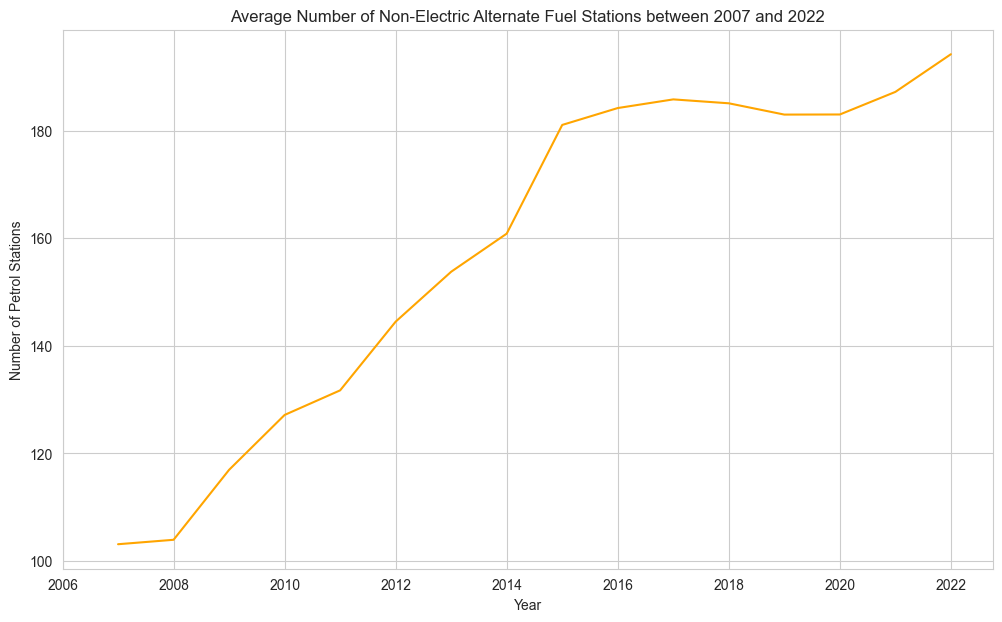

In [11]:
plt.figure(figsize = (12, 7))


plt.plot(st_stations.groupby('year').mean().total - st_stations.groupby('year').mean().electric, color = 'orange')
plt.xlim(2006)
plt.title('Average Number of Non-Electric Alternate Fuel Stations between 2007 and 2022')
plt.xlabel('Year')
plt.ylabel('Number of Petrol Stations');

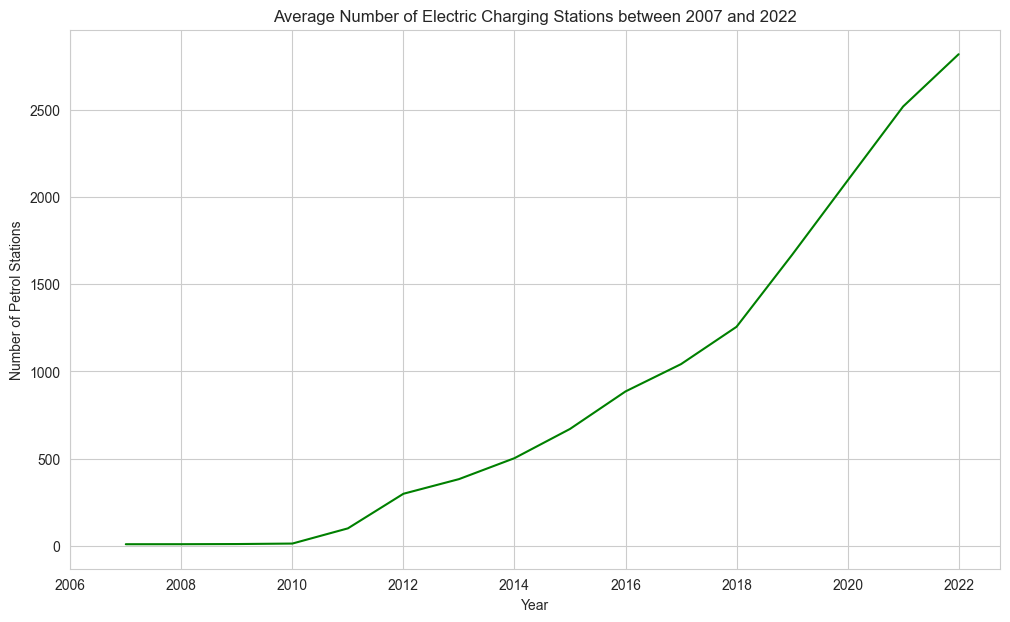

In [12]:
plt.figure(figsize = (12, 7))

plt.plot(st_stations.groupby('year').mean().electric, color = 'green')
plt.xlim(2006)
plt.title('Average Number of Electric Charging Stations between 2007 and 2022')
plt.xlabel('Year')
plt.ylabel('Number of Petrol Stations');

In [53]:
states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
type(states)

states = states.to_crs("EPSG:3395")

geopandas.geodataframe.GeoDataFrame

In [15]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-9529523.377 4137300.133 0.000, -9..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-13051434.065 5496245.142 0.000, -..."
5,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-10186420.016 4867556.657 0.000, -..."
6,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,Midwest,"POLYGON Z ((-10755897.924 5249403.215 0.000, -..."
7,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,Southeast,"POLYGON Z ((-9968040.796 4354501.406 0.000, -9..."
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-10468824.609 3831551.686 0.000, -..."
9,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,Northeast,MULTIPOLYGON Z (((-8465425.708 4556708.788 0.0...


In [16]:
stations_electric.drop([1, 11], inplace = True)

In [17]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5
10,Georgia,20.0625,33.6250,50.2500,1417.4375,0.0000,2.1250,67.9375,1591.4375,2014.5


In [18]:
states.sort_values('NAME')

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
41,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,Southeast,"POLYGON Z ((-9848286.459 3726812.322 0.000, -9..."
19,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,Southwest,"POLYGON Z ((-12779442.255 3818472.179 0.000, -..."
20,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,Southeast,"POLYGON Z ((-10532818.563 4344142.083 0.000, -..."
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
21,08,01779779,0400000US08,08,CO,Colorado,00,268426928342,1176085119,West,"POLYGON Z ((-12140499.436 4623697.048 0.000, -..."
50,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-8203794.047 5001252.612 0.000, -8..."
23,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-8203794.047 5001252.612 0.000, -8..."
39,10,01779781,0400000US10,10,DE,Delaware,00,5047093738,1398754502,Northeast,"POLYGON Z ((-8435099.273 4798343.346 0.000, -8..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...


In [19]:
stations_electric

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
6,Connecticut,1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,Delaware,1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,District of Columbia,5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,Florida,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5
10,Georgia,20.0625,33.6250,50.2500,1417.4375,0.0000,2.1250,67.9375,1591.4375,2014.5


In [20]:
states = states.sort_values('NAME')

In [21]:
states.rename(columns = {
    'NAME' : 'state'
}, inplace = True)

In [22]:
states_electric = pd.merge(states, stations_electric)

states_electric.dropna(inplace=True)

In [24]:
states_electric

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,state,LSAD,ALAND,AWATER,region,geometry,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,01,01779775,0400000US01,01,AL,Alabama,00,131172403111,4594951242,Southeast,"POLYGON Z ((-9848286.459 3726812.322 0.000, -9...",7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
1,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,Southwest,"POLYGON Z ((-12779442.255 3818472.179 0.000, -...",46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
2,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,Southeast,"POLYGON Z ((-10532818.563 4344142.083 0.000, -...",11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
3,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
4,08,01779779,0400000US08,08,CO,Colorado,00,268426928342,1176085119,West,"POLYGON Z ((-12140499.436 4623697.048 0.000, -...",14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5
5,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-8203794.047 5001252.612 0.000, -8...",1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
6,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,Northeast,"POLYGON Z ((-8203794.047 5001252.612 0.000, -8...",1.8125,15.4375,2.7500,560.9375,1.5000,0.5000,17.6875,600.6250,2014.5
7,10,01779781,0400000US10,10,DE,Delaware,00,5047093738,1398754502,Northeast,"POLYGON Z ((-8435099.273 4798343.346 0.000, -8...",1.3750,1.2500,1.0625,92.2500,0.5625,0.0000,6.6875,103.1875,2014.5
8,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8...",5.1250,2.0000,3.1875,279.1875,0.5000,0.0000,0.7500,290.7500,2014.5
9,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...,13.3750,39.0625,67.7500,2342.0000,0.3125,1.4375,99.3750,2563.3125,2014.5


Text(-0.05, 0.5, '')

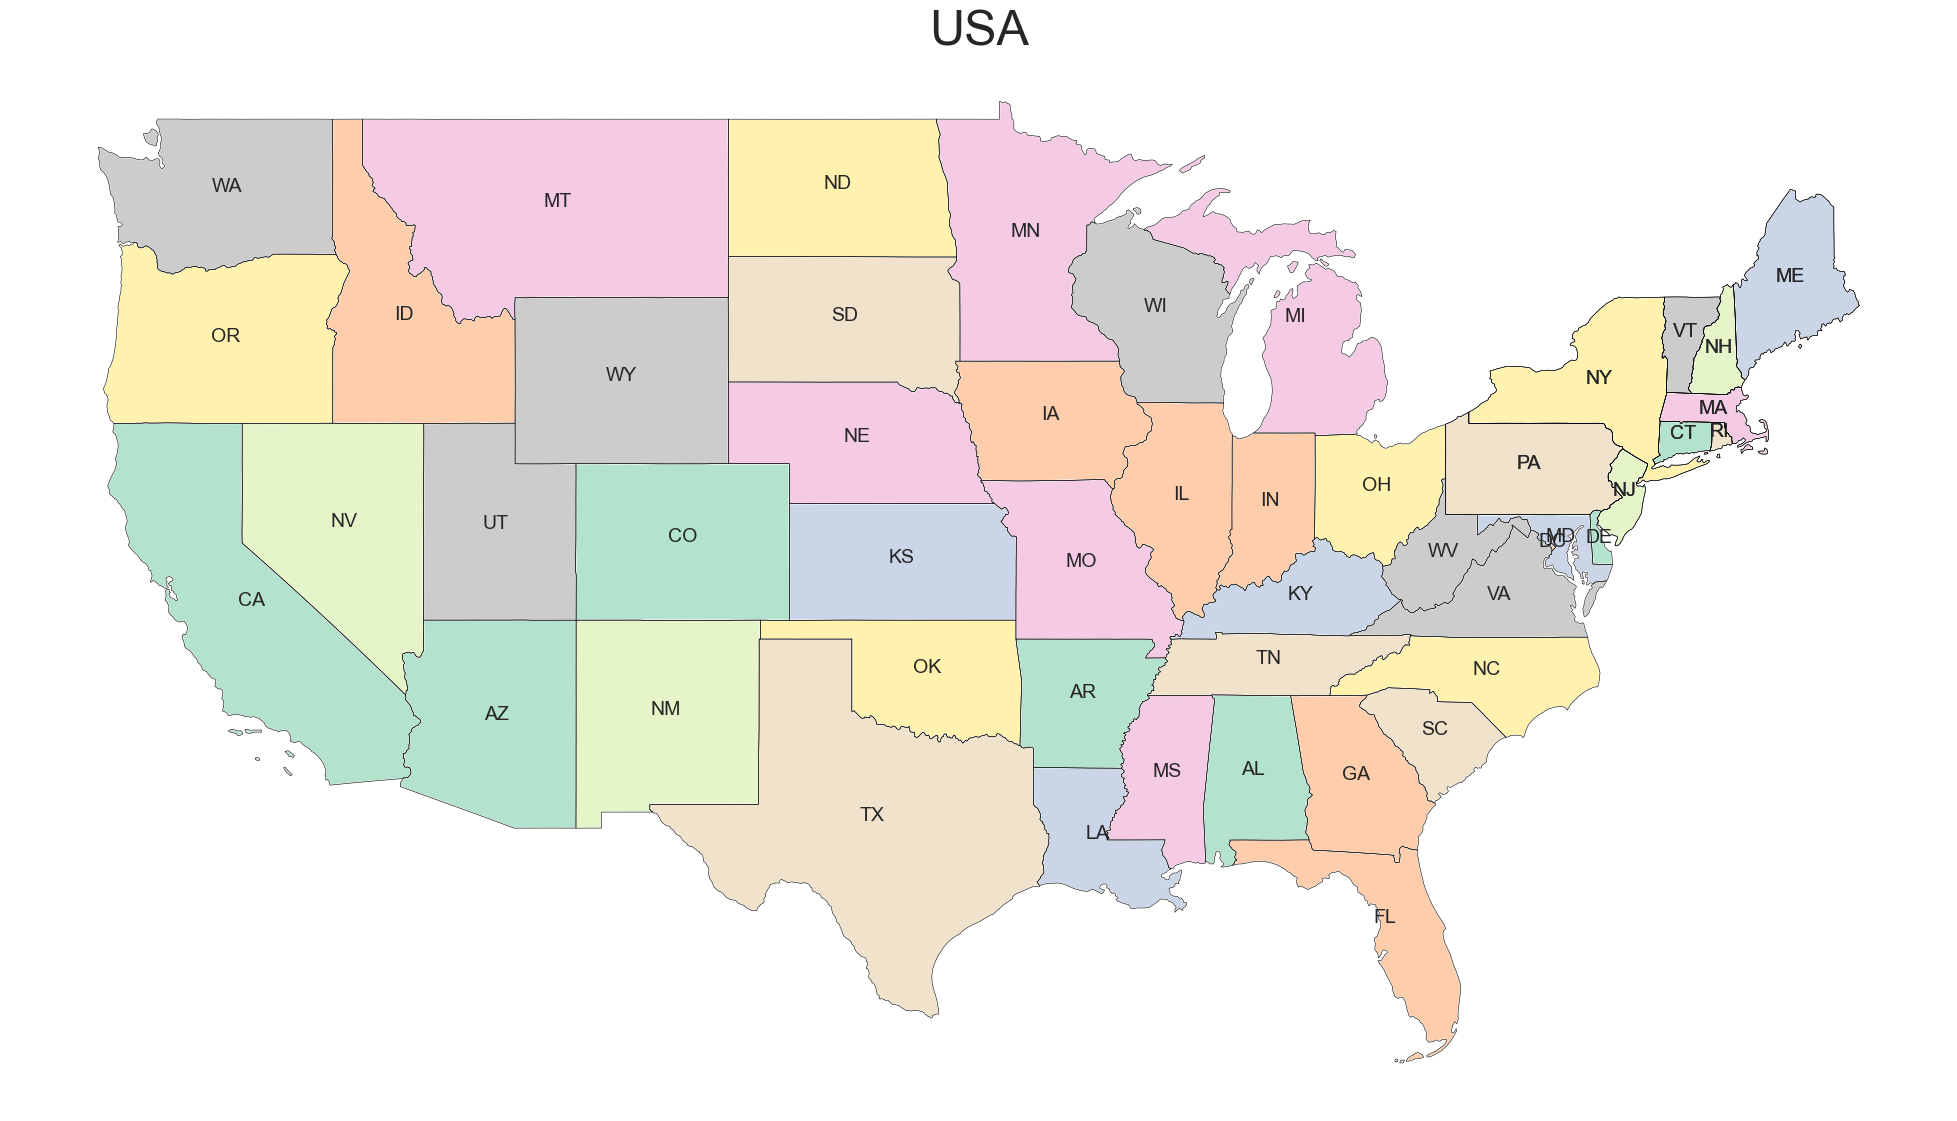

In [25]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()

states_electric.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);

states_electric.boundary.plot(ax=ax, color='Black', linewidth=.4)

states_electric.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

plt.axis('off')
plt.title('USA', fontsize = 35)
ax.text(-0.05, 0.5, '',transform=ax.transAxes,
        fontsize=15, color='gray', alpha=0.5,
        ha='center', va='center', rotation='vertical')

In [26]:
states.drop_duplicates(keep = 'first', inplace=True)

In [27]:
states.shape

(49, 11)

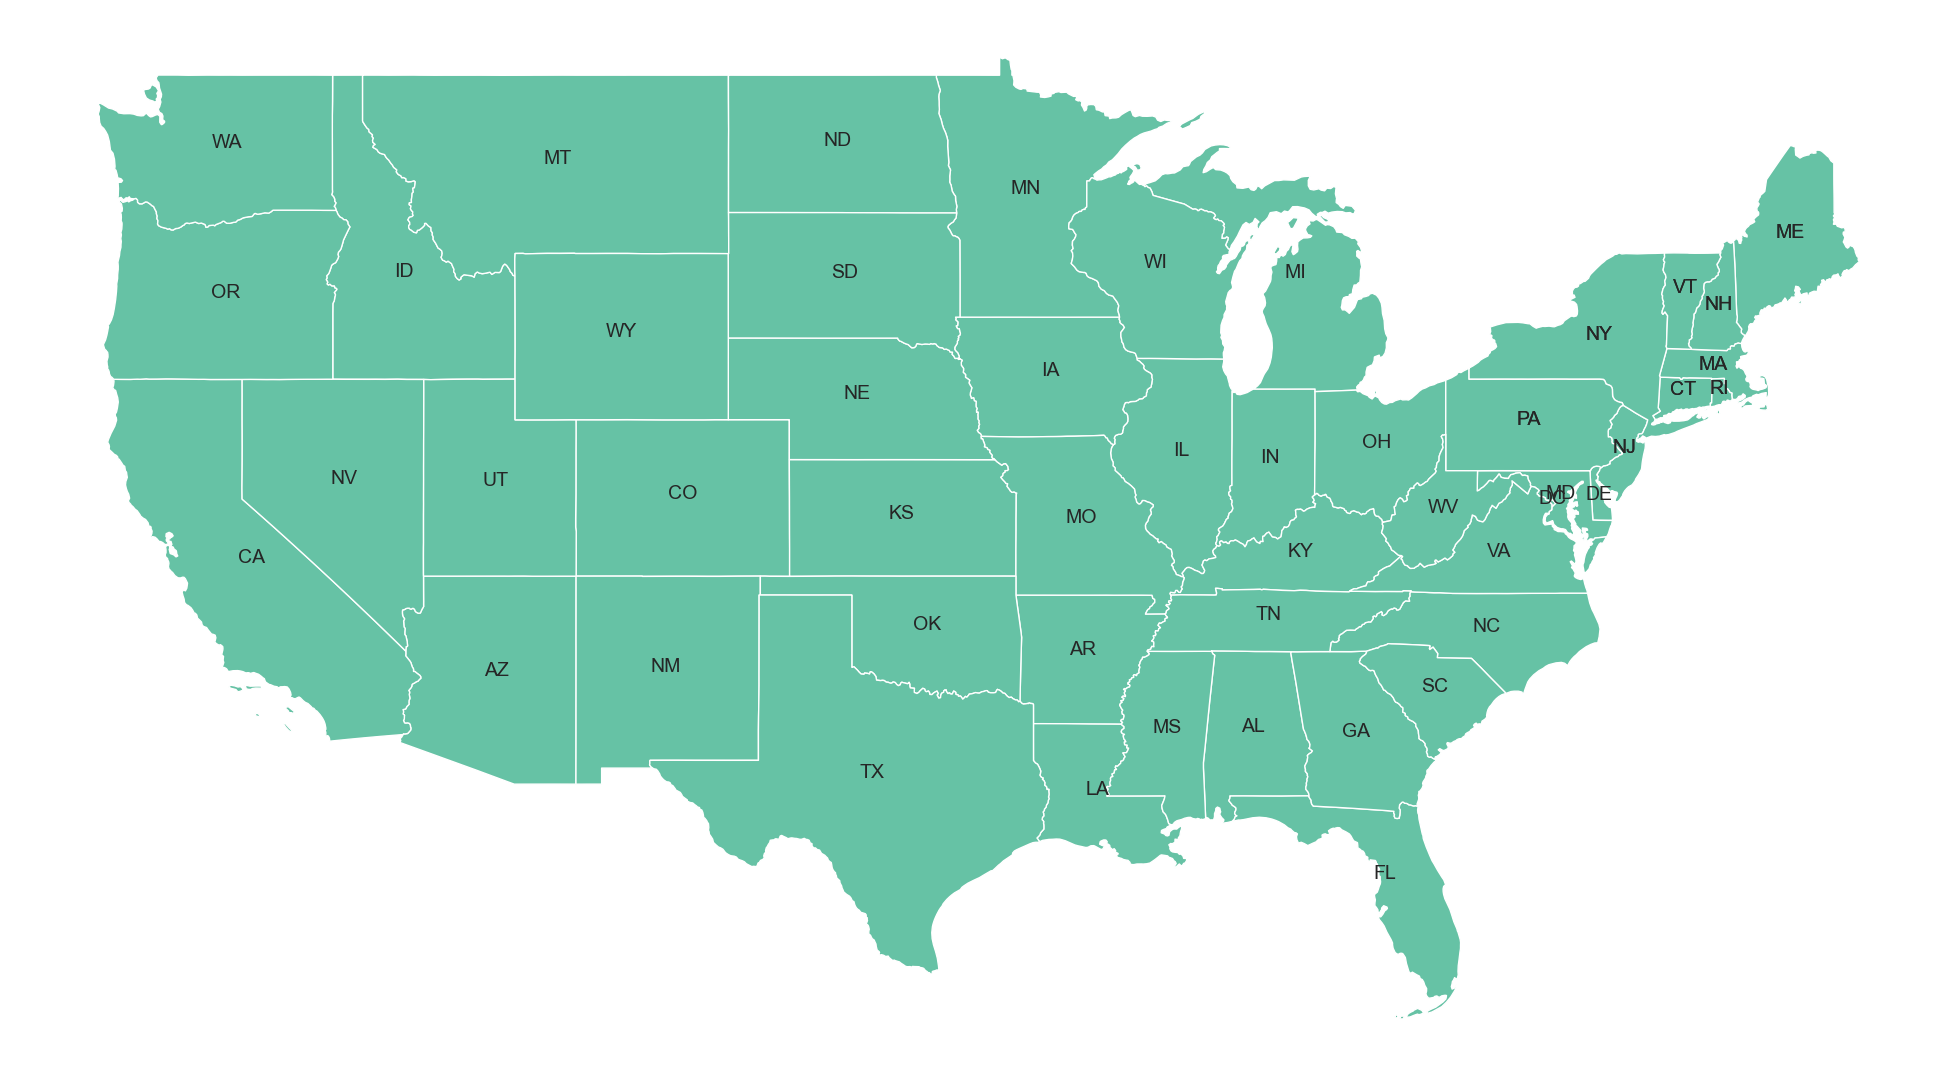

In [28]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
plt.axis('off')
states_electric.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
states.plot(ax=ax, figsize=(12, 12))
plt.show()

In [29]:
pd.concat

<function pandas.core.reshape.concat.concat(objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]', axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'DataFrame | Series'>

In [59]:
st_stations.replace('Alaska', np.nan).dropna(inplace = True)
st_stations.replace('Hawaii', np.nan).dropna(inplace = True)


In [128]:
cmap = 'Greens'

slider = IntSlider(min=2008, max=2022, step=1, value=0, description='Year')

output = Output()

def plot_heatmap(year):
    output.clear_output(wait=True)

    year_stations = st_stations[st_stations.year == year]
    states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
    states = states.to_crs("EPSG:3395")
    states = states.sort_values('NAME')
    states.rename(columns={
        'NAME': 'state'
    }, inplace=True)
    year_stations = pd.merge(states, year_stations)
    year_stations.dropna(inplace=True)
    vmin = year_stations.drop(3)['electric'].min()
    vmax = year_stations.drop(3)['electric'].max()
    with output:
        fig, ax = plt.subplots(1, figsize=(20, 9))
        ax.axis('off')
        year_stations.drop(3).apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='black'), axis=1);
        year_stations.drop(3).boundary.plot(ax=ax, color='Black', linewidth=.4)
        year_stations.drop(3).plot(column='electric', ax=ax, linewidth=1, cmap=cmap)
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
        sm._A = []
        ax.set_title(f'Electric Charging Stations in the US (minus CA) {year}', fontsize=20)
        ax.text(-0.05, 0.5, '', transform=ax.transAxes,
                fontsize=15, color='gray', alpha=0.5,
                ha='center', va='center', rotation='vertical')
        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)

slider = interactive(plot_heatmap, year=slider)
display(slider, output)

interactive(children=(IntSlider(value=2008, description='Year', max=2022, min=2008), Output()), _dom_classes=(…

Output()

In [69]:
df[df.year == 2011]

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
561,Alabama,0.0,1.0,0.0,0.0,0.0,0.0,8.0,9.0,2011
562,Alaska,6.0,11.0,20.0,4.0,0.0,1.0,106.0,148.0,2011
563,Arizona,5.0,6.0,20.0,11.0,0.0,0.0,49.0,91.0,2011
564,Arkansas,14.0,30.0,33.0,43.0,1.0,1.0,67.0,189.0,2011
565,California,48.0,224.0,58.0,1392.0,23.0,34.0,227.0,2006.0,2011
566,Colorado,14.0,29.0,83.0,33.0,1.0,0.0,53.0,213.0,2011
567,Connecticut,3.0,13.0,0.0,40.0,2.0,1.0,16.0,75.0,2011
568,Delaware,1.0,1.0,1.0,0.0,0.0,0.0,3.0,6.0,2011
569,District of Columbia,2.0,2.0,3.0,51.0,0.0,0.0,0.0,58.0,2011
570,Florida,15.0,15.0,62.0,357.0,0.0,0.0,71.0,520.0,2011


In [52]:
st_stations.drop([1,11], inplace = True)